# Image-Text Retrieval using Saleforce's BLIP model

In [4]:
from transformers.utils import logging
logging.set_verbosity_error()

from transformers import BlipForImageTextRetrieval
from transformers import AutoProcessor

In [ ]:
# Preparing Pipeline
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

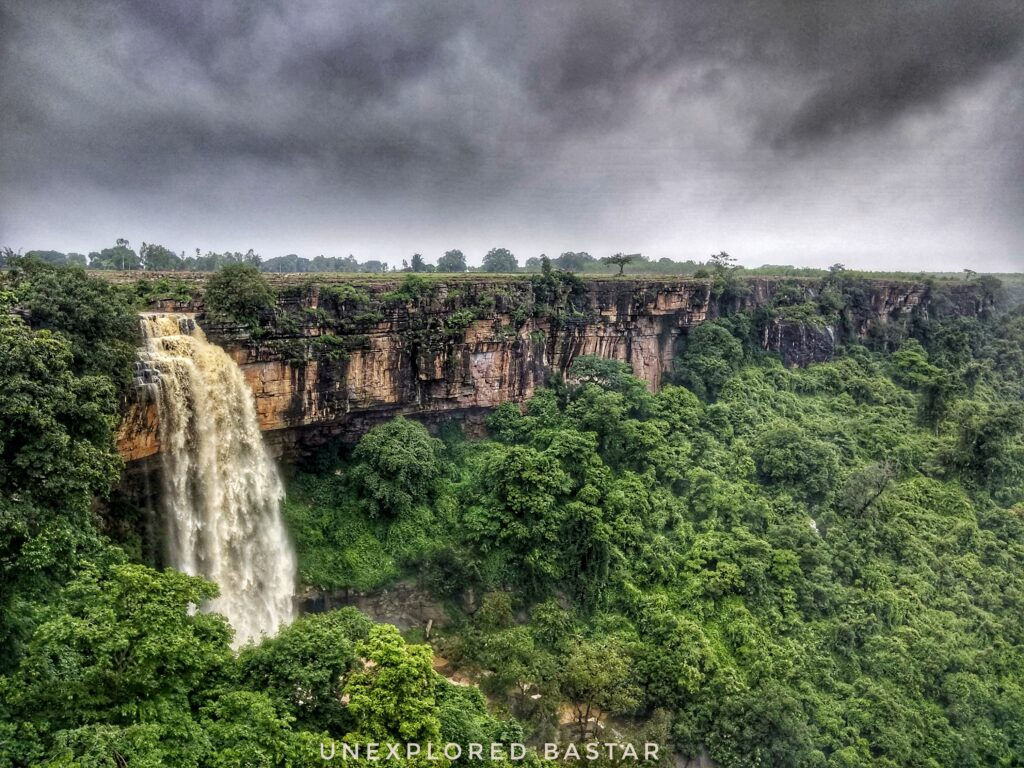

In [8]:
from PIL import Image
import requests

raw_image =  Image.open("cg_falls.jpeg").convert('RGB')
raw_image

In [11]:
import torch

# Preparing text to be matched
text = "an image of a forest with waterfall, having lots of water flowing."

inputs = processor(
    images=raw_image,
    text=text,
    return_tensors="pt"
)

# Inference
itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(itm_scores, dim=1)
print(f"""\
The image and text are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.8969


In [12]:
# Lets try another example

text = "an image of a barren land, with people talking"

inputs = processor(
    images=raw_image,
    text=text,
    return_tensors="pt"
)

# Inference
itm_scores = model(**inputs)[0]
itm_score = torch.nn.functional.softmax(itm_scores, dim=1)
print(f"""\
The image and text are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.0005
